Seaborn是针对统计绘图的，一般能满足数据分析90%的绘图要求，可以把Seaborn视为matplotlib的补充，而不是替代物！
使用matplotlib最大的困难是其默认的各种参数，而Seaborn则完全避免了这一问题。

seaborn一共有5个大类21种图，分别是：
+ Relational plots　关系类图表
    1. replot() 关系类图表，其实是下面两种图的集成，通过指定kind参数可以画出下面的两种图
    2. scatterplot() 散点图
    3. lineplot() 折线图
+ Categorical plots 分类图表
    1. catplot() 分类图表的接口，其实是下面八种图表的集成，，通过指定kind参数可以画出下面的八种图
    2. stripplot() 分类散点图
    3. swarmplot() 能够显示分布密度的分类散点图
    4. boxplot() 箱图
    5. violinplot() 小提琴图
    6. boxenplot() 增强箱图
    7. pointplot() 点图
    8. barplot() 条形图
    9. countplot() 计数图
+ Distribution plot 分布图
    1. jointplot() 双变量关系图
    2. pairplot() 变量关系组图
    3. distplot() 直方图，质量估计图
    4. kdeplot() 核函数密度估计图
    5. rugplot() 将数组中的数据点绘制为轴上的数据
+ Regression plots　回归图
    1. lmplot() 回归模型图
    2. regplot() 线性回归图
    3. residplot() 线性回归残差图
+ Matrix plots 矩阵图
    1. heatmap() 热力图
    2. clustermap() 聚集图

## Seaborn快速教程 

In [54]:
# 参考链接http://www.lunarnai.cn/2017/07/24/seaborn/
# seaborn内置样例数据
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 设置绘图显示大小
# 查看数据格式  
df = pd.read_csv('./data/Pokemon.csv', index_col=0, encoding='cp1252')
df.head()
# print(df)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### 简单绘图

下面我们利用seaborn的的**lmplot函数来绘制最基本的回归模型图**。
下面给出了两种方式:
1. 将数据集(DataFrame结构)传递给data参数，同时将列名传递给轴参数:x and y
2. 直接将一些列数据传递给轴参数

第一种式更为推荐，因为不会出现x和y长度不一的情况。

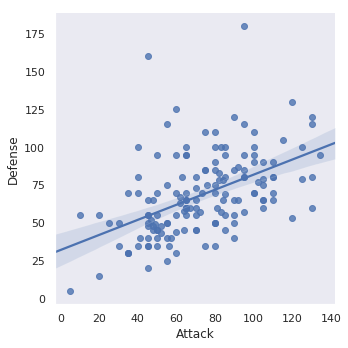

In [153]:
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 设置绘图显示大小
# lmplot()函数绘制回归模型图
sns.lmplot(x='Attack', y='Defense', data=df)
# 也可以这样
# sns.lmplot(x=df.Attack, y=df.Defense)

这里我们可以看到，这张图中自动生成了一条拟合直线，但是这在我们的数据集中没有意义，通过设置fit_reg=False移除掉拟合曲线。同时我们想根据宠物小精灵的阶段(‘Stage’字段)**给散点染色**，这时只要简单的设置两个参数如下：

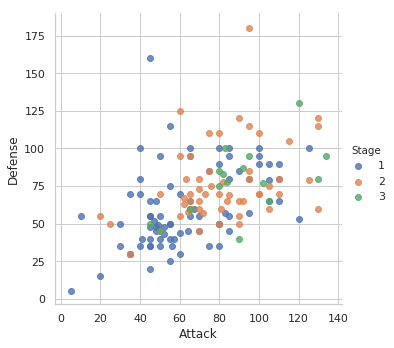

In [156]:
# hue, col, row : **strings**.
# Variables that define subsets of the data, which will be drawn on separate facets in the grid.
sns.lmplot(x='Attack', y='Defense', data=df, 
           fit_reg=False, 
           hue='Stage')

### 利用matplotlib调整图像 

前面说过了，seaborn是matplotlib的高阶接口，也就是我们利用seaborn生成的图表也能用matplotlib进行调整。
例如，我们可以看到上图x/y轴的起点都不是0，而我们的数值（攻击力和防御力）必然都是非负的?

同时我们又想给这张表加个标题。这时我们就可以利用matplotlib来做相应调整。

Text(0.5, 1.0, 'Attack&Defense of Pokemons')

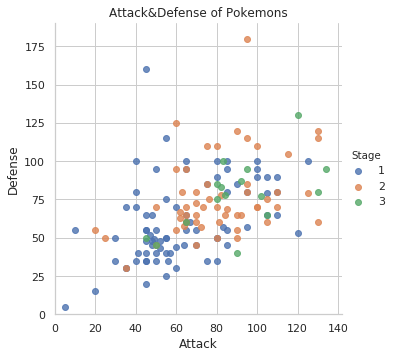

In [57]:
# 绘图
sns.lmplot(x='Attack', y='Defense', data=df, 
           fit_reg=False, 
           hue='Stage')
# 调整
plt.xlim(0, None)    # Get or set the x limits of the current axes.
plt.ylim(0, None)
plt.title('Attack&Defense of Pokemons')

### 加上pandas更好用 

我们知道pandas是一个炒鸡好用的处理数据的模块，在用seaborn绘图时，我们加上pandas能够事半功倍。

例如我们想绘制一个**箱式图**，seaborn的默认图是这样的：

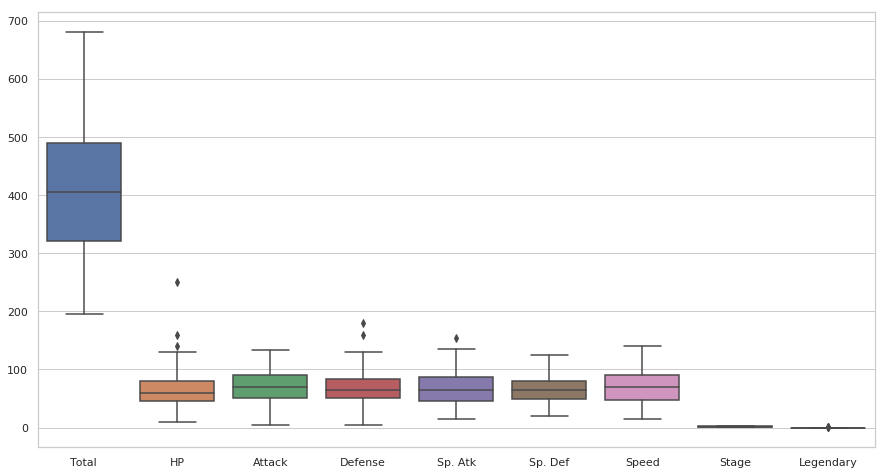

In [82]:
sns.boxplot(data=df)
# # 查看数据格式  
# df2 = pd.read_csv('./data/train.csv', index_col=0, encoding='cp1252')
# df2.head()
# sns.boxplot(data=df2)

使用默认的df数据绘制的箱式图，虽然能看出一些东西，但实际上一些cloumns: total，Stage和Legendary都没有意义，因此使用pandas函数创建新的DataFrame变得有必要了。

df.drop函数使用:

**Signature**: df.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

**Docstring**:
Drop specified labels from rows or columns.
参数解释:
+ labels: 单独的label或者类似列表的数据(包含要删除的Index或者column labels)
+ axis: 从index(0 or 'index)或者columns(1 or 'columns)中根据labels删除
+ level:略

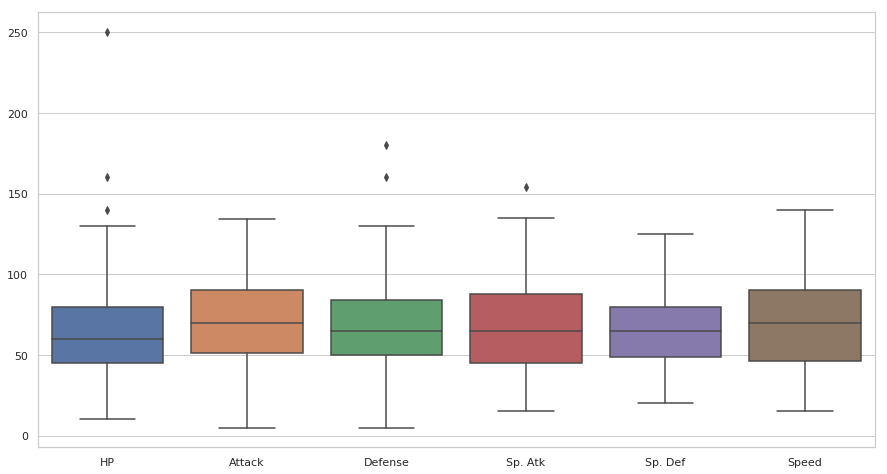

In [83]:
# 创建新的DataFrame，舍去无用字段
# df.drop 
# Remove rows or columns by specifying label names and corresponding axis, 
# or by specifying directly index or column names
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
# stats_df = df.drop([1, 2], axis=0)
sns.boxplot(data=stats_df)

###  淡妆浓抹 主题和颜色

为了使图表更加美观，seaborn提供了5种内置的主题，分别是`darkgrid`, `whitegrid`, `dark`, `white`和`ticks`。通过set_style函数就可以设置。

我们也可以设置自定义颜色，包括自定义循环色，渐变色等，具体可以参见[文档](https://seaborn.pydata.org/tutorial/color_palettes.html)

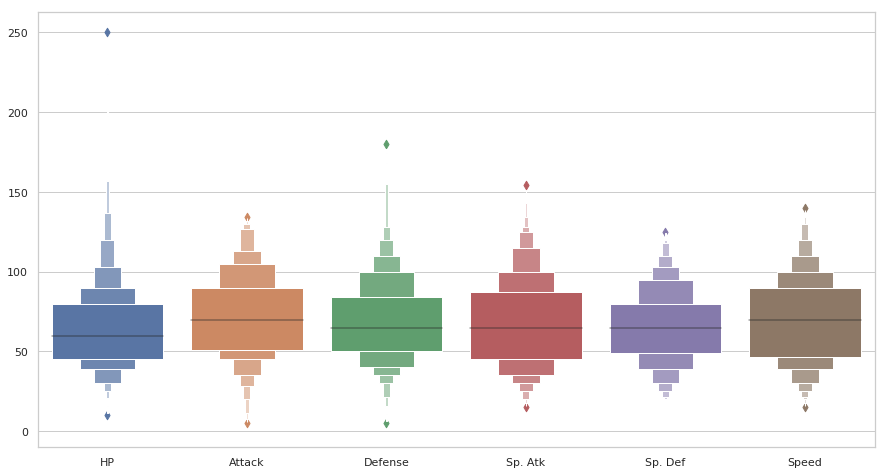

In [155]:
sns.set_style('whitegrid')
sns.boxenplot(data=stats_df)

         Name Type 1  Type 2  Total  ...  Sp. Def  Speed  Stage  Legendary
#                                    ...                                  
1   Bulbasaur  Grass  Poison    318  ...       65     45      1      False
2     Ivysaur  Grass  Poison    405  ...       80     60      2      False
3    Venusaur  Grass  Poison    525  ...      100     80      3      False
4  Charmander   Fire     NaN    309  ...       50     65      1      False
5  Charmeleon   Fire     NaN    405  ...       65     80      2      False

[5 rows x 12 columns]


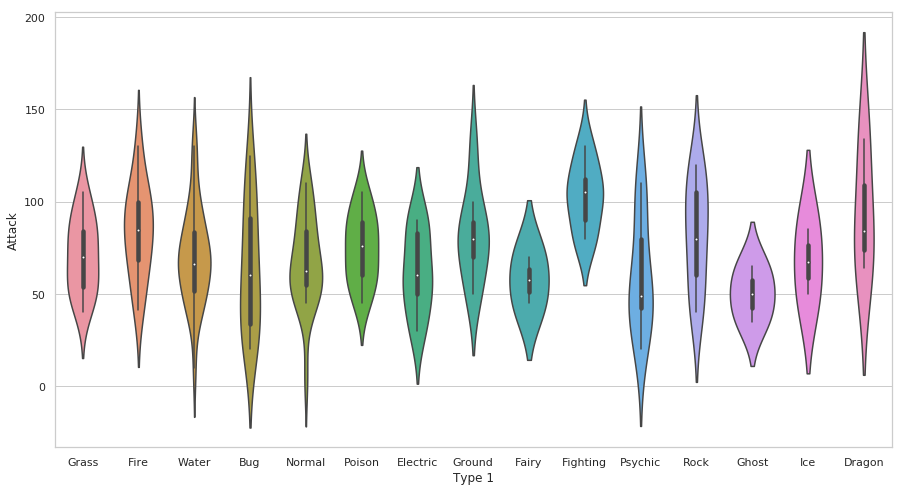

In [85]:
# Set theme
sns.set_style('whitegrid')
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 设置绘图显示大小
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)
print(df.head())

palette : palette name, list, or dict, optional.
***
    Colors to use for the different levels of the ``hue`` variable. Should
    be something that can be interpreted by :func:`color_palette`, or a
    dictionary mapping hue levels to matplotlib colors.

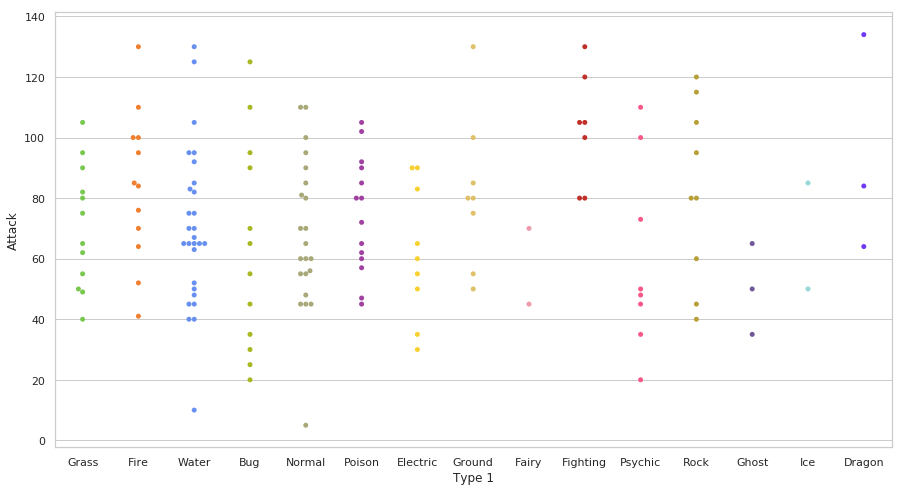

In [86]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# 带密度分布的散点图
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

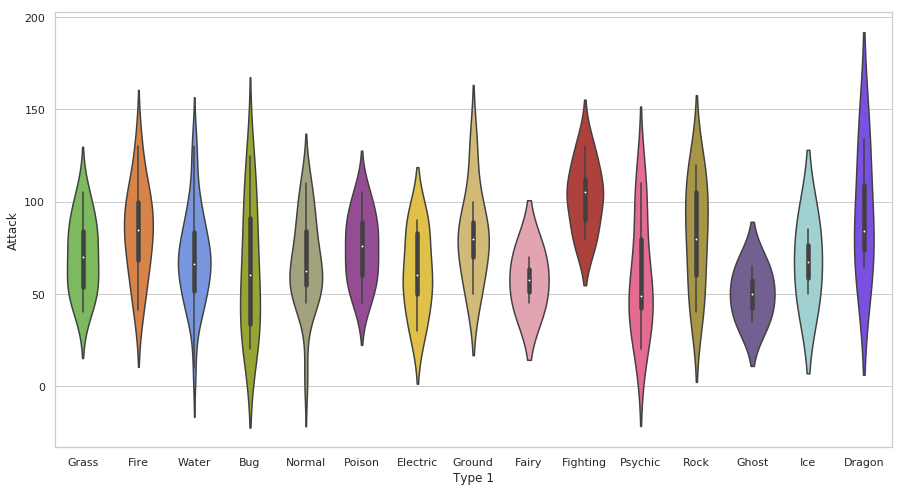

In [87]:
# Violin plot with Pokemon color palette
# sns.violinplot函数绘制箱线图和核密度估计图的组合，使用platte=参数来重新为绘图着色
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

### 叠加plots非常简单 

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

- First, we'll make our figure larger using Matplotlib.
- Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.
- Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
- Finally, we'll set a title using Matplotlib.

Text(0.5, 1.0, 'Attack by Type')

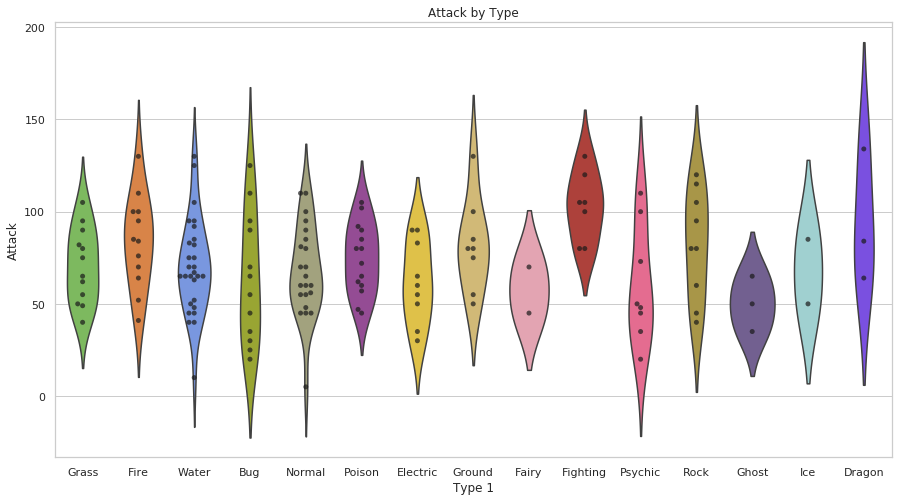

In [88]:
# Set figure size with matplotlib
# plt.figure() Create stats_df.head()
plt.figure(figsize=(15,8))
# Create plot
sns.violinplot(x='Type 1',
               y='Attack',
               data=df,
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
sns.swarmplot(x='Type 1',
              y='Attack',
              data=df,
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
# sns.swarmplot(x='Type 1', 
#               y='Attack', 
#               data=df, 
#               color='k', # Make points black
#               alpha=0.7) # and slightly transparent
# Set title with matplotlib
plt.title("Attack by Type")

这个图表告诉我们不同的神奇宝贝类型攻击值是如何分布的！！

### 融合melt 

上面我们已经将攻击力的带分布散点图画出来了，当然我们可以为其他特征各画一幅图，但是更好的做法是将其融合起来。我们用pandas的melt函数，它需要三个参数：
- 需要融合的DataFrame，
- 保留的变量（这些特征不会被融合，而其他的都会被融合），
- 最后融合变量的名字。我们以妙蛙种子为例：

Signature: pd.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)

Docstring:
Unpivots a DataFrame from wide format to long format, optionally
leaving identifier variables set.

This function is useful to massage a DataFrame into a format where one
or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to
the row axis, leaving just two non-identifier columns, 'variable' and
'value'.

pd.melt()。该方法接收以下参数：

- frame: 需要处理的数据框；
- id_vars: 保持原样的数据列；
- value_vars: 需要被转换成变量值的数据列. tuple, list, or ndarray, optional. Column(s) to unpivot. **If not specified, uses all columns that are not set as `id_vars`**.
- var_name: 转换后变量的列名. scalar, default 'value'. Name to use for the 'value' column.
- value_name: 数值变量的列名

In [113]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

#  融合前，妙蛙种子只有一行数据，包含了所有特征
print('Before melting')
print(stats_df[stats_df['Name'] == 'Bulbasaur'])
# 我们进行融合，保留Type1/2和Name
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], 
                    var_name="Stat") 
print('\n\nAfter melting')
# 融合后，妙蛙种子有6行数据，分别包含了除了Name,Type1/2以外的特征
print(melted_df[melted_df['Name'] == 'Bulbasaur'])

Before melting
        Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
#                                                                        
1  Bulbasaur  Grass  Poison  45      49       49       65       65     45


After melting
          Name Type 1  Type 2     Stat  value
0    Bulbasaur  Grass  Poison       HP     45
151  Bulbasaur  Grass  Poison   Attack     49
302  Bulbasaur  Grass  Poison  Defense     49
453  Bulbasaur  Grass  Poison  Sp. Atk     65
604  Bulbasaur  Grass  Poison  Sp. Def     65
755  Bulbasaur  Grass  Poison    Speed     45


In [109]:
stats_df.head()
stats_df.isnull()
# 检查某列是否有缺失数据NaN
print(df.isnull().any())

Name         False
Type 1       False
Type 2        True
Total        False
HP           False
Attack       False
Defense      False
Sp. Atk      False
Sp. Def      False
Speed        False
Stage        False
Legendary    False
dtype: bool


接下来绘制所有特征散点图融合的图表

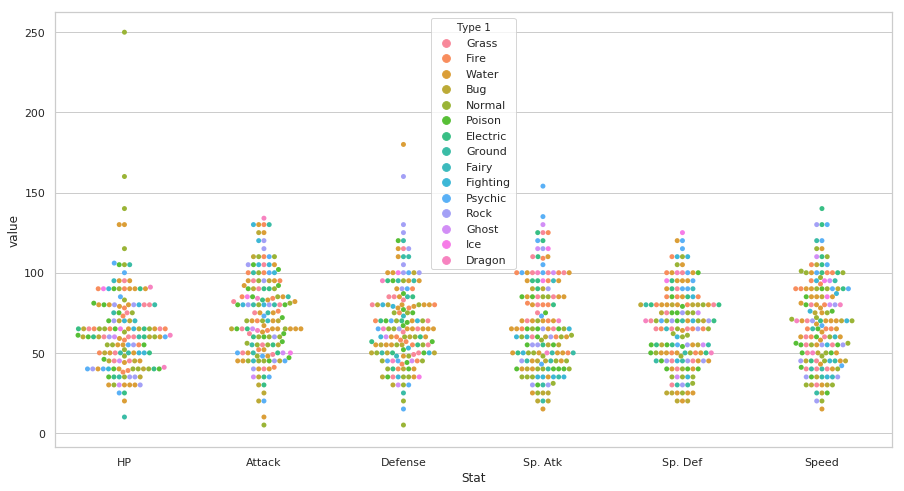

In [117]:
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 设置绘图显示大小
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

这样一看，明显图比较杂乱，我们再做一些改进

/home/harley/.local/lib/python3.6/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


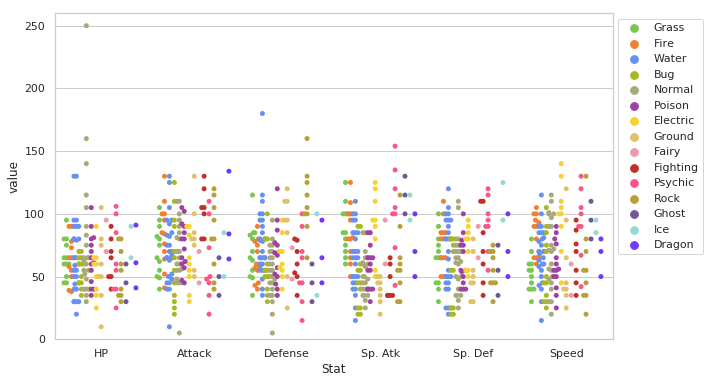

In [118]:
# 1. 把图放大一些，长10inches，高6inches
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. 将不同的type的数据点分开
              palette=pkmn_type_colors) # 3. 是由之前的自定义调色盘
 
# 4. y轴放长一点更显美观
plt.ylim(0, 260)
 
# 5. 图例放到右边去
plt.legend(bbox_to_anchor=(1, 1), loc=2)

### 各类其他图表 

#### 相关性热力图 

Signature: sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

Docstring:

Plot rectangular data as a color-encoded matrix.　用处：将数据绘制为颜色方格（编码矩阵）(相关性“热力图)

热力图的特点在于，**定义两个具有意义的dimension，看数据在这两个dimension下的统计情况，完成对比分析**。

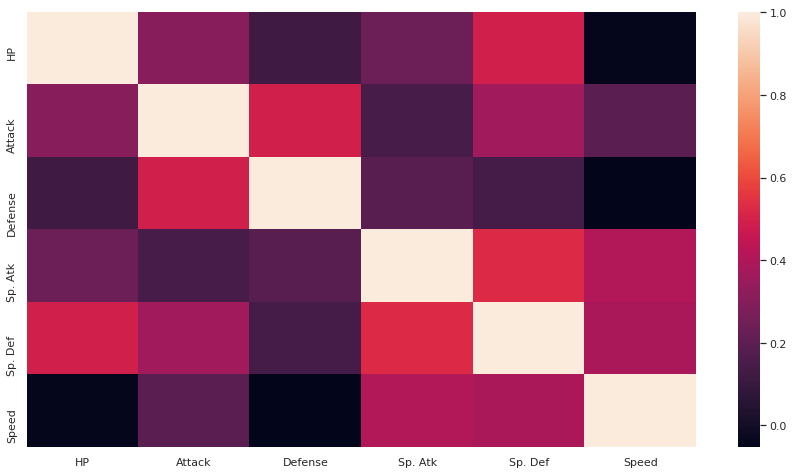

In [151]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
# 计算相关性
corr = stats_df.corr()
# 热力图Heatmap
sns.heatmap(data=corr)

## 风格管理-绘图风格设置 

In [21]:
# %matlpotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, 'ereferfrfger')))

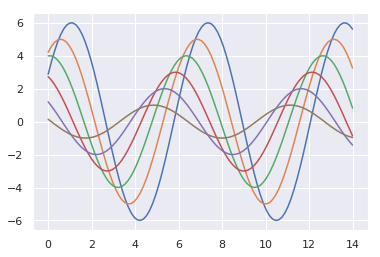

In [22]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i*0.5)*(7-i)*flip)
sinplot()

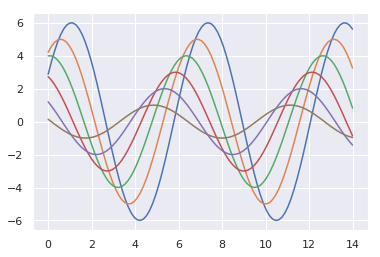

In [17]:
# 转换为seaborn默认绘图
sns.set()
sinplot()

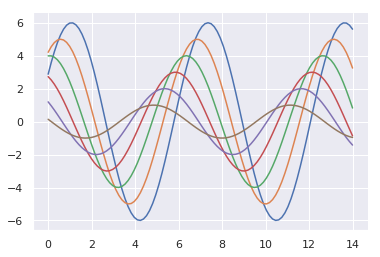

In [19]:
# 移除轴脊柱
sinplot()
sns.despine()

Seaborn 将 matplotlib 的参数划分为两个独立的组合。第一组是设置绘图的外观风格的，第二组主要将绘图的各种元素按比例缩放的，以至可以嵌入到不同的背景环境中。

操控这些参数的接口主要有两对方法：

+ 控制风格：axes_style(), set_style()
+ 缩放绘图：plotting_context(), set_context()

每对方法中的第一个方法（axes_style(), plotting_context()）会返回一组字典参数，而第二个方法（set_style(), set_context()）会设置matplotlib的默认参数。

### Seaborn的五种绘图风格

有五种seaborn的风格，它们分别是：**darkgrid, whitegrid, dark, white, ticks**。它们各自适合不同的应用和个人喜好。默认的主题是darkgrid。

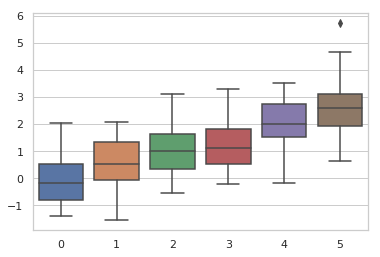

In [16]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)